# Logistic Regression
## y=b0+b1x1+b2x2+b3x3+b4x4....+c

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

sal=np.random.randint(10000,50000,30)
age = np.random.randint(20,60,30)

In [4]:
df=pd.DataFrame(list(zip(age,sal)),columns="age sal".split())
df

,age,sal
0,52,34516
1,46,35511
2,47,31443
3,20,48081
4,21,46176
5,25,18242
6,45,10258
7,28,22499
8,37,14625
9,36,42180


Text(0, 0.5, 'Salary')

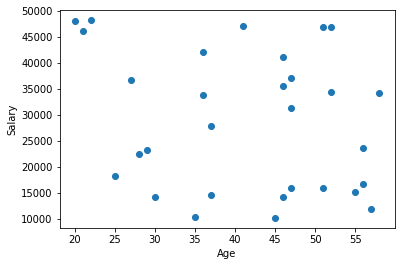

In [5]:
# Visualisation of the Data
plt.scatter(df.age,df.sal)
plt.xlabel("Age")
plt.ylabel("Salary")

In [6]:
df["Purchased"]=df["age"]
df["Purchased"]=df.apply(lambda x :1 if (6*x["age"]+3*x["sal"])>80000 else 0,axis=1)
df

,age,sal,Purchased
0,52,34516,1
1,46,35511,1
2,47,31443,1
3,20,48081,1
4,21,46176,1
5,25,18242,0
6,45,10258,0
7,28,22499,0
8,37,14625,0
9,36,42180,1


In [7]:
 #Introduce some errors 
age
df.age = df['age']+np.random.randint(20,40,30)
df.sal = df.sal +np.random.randint(10000,40000,30)
df


,age,sal,Purchased
0,78,45891,1
1,76,68898,1
2,69,42696,1
3,52,61277,1
4,54,83139,1
5,64,32427,0
6,73,50042,0
7,59,44133,0
8,73,54255,0
9,70,66324,1


In [8]:
df.to_csv("car_purch.csv",index=0)


In [9]:
data= pd.read_csv("car_purch.csv")
data.head(10)

,age,sal,Purchased
0,78,45891,1
1,76,68898,1
2,69,42696,1
3,52,61277,1
4,54,83139,1
5,64,32427,0
6,73,50042,0
7,59,44133,0
8,73,54255,0
9,70,66324,1


In [10]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values
X

array([[   78, 45891],
       [   76, 68898],
       [   69, 42696],
       [   52, 61277],
       [   54, 83139],
       [   64, 32427],
       [   73, 50042],
       [   59, 44133],
       [   73, 54255],
       [   70, 66324],
       [   51, 52460],
       [   80, 51582],
       [   86, 85982],
       [   78, 41705],
       [   66, 42362],
       [   82, 30446],
       [   94, 47693],
       [   49, 86216],
       [   72, 53815],
       [   77, 61840],
       [   71, 80007],
       [   56, 47784],
       [   78, 50131],
       [   68, 48674],
       [   79, 63522],
       [   75, 55500],
       [   89, 54417],
       [   52, 65575],
       [   84, 49800],
       [   87, 69751]])

In [11]:
Y

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_testt=train_test_split(X,Y,test_size=1/4,random_state=42)


### Preprocessing 

In [13]:
# Feature Scalling
## Feature scalling is done when one column is llarger than the othe r
from sklearn.preprocessing import StandardScaler
obj_ss = StandardScaler()
x_train=obj_ss.fit_transform(x_train)
x_test=obj_ss.fit_transform(x_test)


## ML Model

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [15]:
y_testt

array([1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [20]:
print(model.coef_)
print(model.intercept_)


[[-0.33312336  1.28674023]]
[0.10253682]
